### Analise de número da MegaSena

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [84]:
history_df = pd.read_csv("mega_sena_history.txt", sep=" ", header=None) #header=None if no header row

history_df.head()

0   1   2   3   4   5
0  41   5   4  52  30  33
1   9  39  37  49  43  41
2  36  30  10  11  29  47
3   6  59  42  27   1   5
4   1  19  46   6  16   2

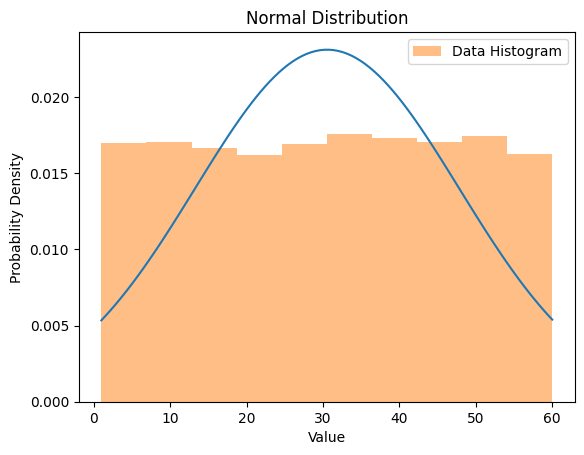

In [85]:
numbers = np.hstack(history_df.iloc[:,0:].values)
# --- Statistical Calculations ---
mean = np.mean(numbers)
std = np.std(numbers)

# --- Generate Normal Distribution ---
x = np.linspace(min(numbers), max(numbers), 100) #100 data points to generate a smooth curve
y = (1/(std * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * std**2)))

# --- Plotting ---
plt.plot(x, y)
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.hist(numbers, density=True, alpha=0.5, label='Data Histogram') #Show data's histogram to compare
plt.legend()
plt.show()

#Pandas is not strictly needed to plot.  You could add this if you wish to keep your numbers in a dataFrame:
numbers_df = pd.DataFrame({'numbers':numbers})

In [86]:
# dezenas mais frequentes na Mega-Sena
most_frequency=numbers_df.groupby('numbers').size().reset_index(name='counts').sort_values('counts', ascending=False)
most_frequency.head(6).reset_index(drop=True)

numbers  counts
0       10     328
1       53     319
2       33     304
3       34     304
4        5     302
5       37     302

In [185]:
# procura sequencias que nunca sairam
import random
def generate_unique_combination(history, disponible_numbers= range(1, 61)):
    """Generates a new Mega-Sena combination not in the history."""
    while True:
        combination = sorted(random.sample(disponible_numbers, 6)) 
        found_sentence = history_df.apply(lambda row: all(row.sort_values() == combination), axis=1)

        if True not in found_sentence:
            return combination

for i in range(10): 
    new_combination = generate_unique_combination(history_df.values)
    print(f"New combination: {new_combination}")

New combination: [2, 12, 14, 31, 40, 53]
New combination: [3, 15, 18, 27, 28, 37]
New combination: [5, 24, 25, 32, 44, 56]
New combination: [34, 35, 37, 56, 58, 60]
New combination: [12, 18, 23, 43, 45, 51]
New combination: [5, 6, 10, 13, 16, 45]
New combination: [5, 7, 14, 34, 52, 59]
New combination: [1, 4, 6, 29, 50, 59]
New combination: [11, 19, 21, 53, 55, 56]
New combination: [2, 18, 24, 51, 52, 55]


In [193]:
# procura sequencias que nunca sairam, com base nos 10 números mais frequentes  
print('Números disponíveis',  most_frequency.head(10)['numbers'].values.tolist()) 
for i in range(10): 
    new_combination = generate_unique_combination(history_df.values, disponible_numbers=  most_frequency.head(10)['numbers'].values.tolist())
    print(f"New combination: {new_combination}")

Números disponíveis [10, 53, 33, 34, 5, 37, 42, 23, 44, 32]
New combination: [5, 33, 37, 42, 44, 53]
New combination: [5, 10, 34, 37, 44, 53]
New combination: [5, 10, 23, 33, 42, 53]
New combination: [10, 23, 32, 33, 42, 44]
New combination: [5, 10, 23, 33, 42, 53]
New combination: [32, 33, 34, 42, 44, 53]
New combination: [10, 23, 33, 34, 42, 53]
New combination: [5, 32, 34, 37, 44, 53]
New combination: [5, 10, 32, 34, 37, 53]
New combination: [5, 10, 32, 33, 44, 53]


In [194]:
# procura sequencias que nunca sairam, com base nos 10 números menos frequentes  
print('Números disponíveis',  most_frequency.tail(10)['numbers'].values.tolist()) 
for i in range(10): 
    new_combination = generate_unique_combination(history_df.values, disponible_numbers=  most_frequency.head(10)['numbers'].values.tolist())
    print(f"New combination: {new_combination}")

Números disponíveis [9, 40, 3, 48, 31, 22, 15, 55, 21, 26]
New combination: [10, 23, 32, 34, 37, 42]
New combination: [10, 32, 33, 34, 37, 42]
New combination: [32, 33, 34, 37, 42, 44]
New combination: [5, 10, 23, 37, 42, 53]
New combination: [5, 10, 23, 32, 44, 53]
New combination: [5, 10, 23, 32, 37, 44]
New combination: [23, 32, 33, 34, 44, 53]
New combination: [5, 10, 23, 33, 37, 44]
New combination: [10, 23, 32, 37, 44, 53]
New combination: [10, 23, 32, 34, 42, 44]
